In [1]:
# Name: Cynthia Nosiri
# Class: EEGR 565.M85 - Machine Learning Applications
# Predict the age of abalone from physical measurements
# Google drive link: https://drive.google.com/drive/u/1/folders/1l9muVJQBVnnu4fbtM42EctmHOknhC0iE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read the data with no header
df = pd.read_csv("abalone.data", header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Label encoding sex column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[0] = le.fit_transform(df[0])
df

,0,1,2,3,4,5,6,7,8
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
# df.drop(8, axis =1, inplace = True)
# df

In [6]:
# Let x. be the first 7 columns
# let y be the target column
from sklearn import preprocessing
x = df.iloc[:, 0:8]
y = df.iloc[:, -1]
# x= preprocessing.normalize(x)
print(y)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: 8, Length: 4177, dtype: int64


In [7]:
# split data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# print(x_train)

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C=1)
regressor.fit(x_train,y_train)

SVR(C=1)

In [9]:
# len(y_pred)

In [10]:
regressor.score(x_test, y_test)

0.4881052329155301

In [11]:
y_pred = regressor.predict(x_test).tolist()
y_test.tolist()
zipped = list(zip(y_pred, y_test))
zipped

[(11.310768809557286, 9),
 (9.960593514781722, 8),
 (11.990324581837651, 16),
 (10.983907895624219, 9),
 (10.196853459467839, 14),
 (9.263326439863555, 11),
 (8.895461992037516, 7),
 (9.033063237312286, 6),
 (6.4173118790555455, 7),
 (10.229640531106767, 10),
 (10.792510960521668, 22),
 (6.5113161170536635, 7),
 (11.20532553720598, 15),
 (6.725589868321821, 9),
 (8.36815236916089, 8),
 (11.552960208660938, 18),
 (11.5167655167498, 11),
 (10.46312318415551, 14),
 (12.454899018915656, 13),
 (8.85887845208665, 9),
 (14.02012351390379, 20),
 (8.900076516775245, 12),
 (10.666659223339026, 12),
 (10.725514183404433, 11),
 (9.565524281587306, 10),
 (7.553637277799666, 7),
 (9.107015441827766, 11),
 (8.697557105511278, 8),
 (9.656550910865576, 9),
 (9.793996697530687, 10),
 (11.116381134812412, 9),
 (10.858283733016844, 10),
 (6.4372403159834555, 6),
 (9.83588138276176, 10),
 (8.232512993709685, 8),
 (9.352832296700262, 9),
 (5.795849207823347, 5),
 (4.258111124546116, 3),
 (9.267923559522265,

In [12]:
# sort zipped result
new_df = pd.DataFrame(zipped).sort_values(by = 1, inplace = False)
new_df

,0,1
358,4.401713,3
37,4.258111,3
355,4.458368,3
516,4.879032,4
612,4.713088,4
...,...,...
317,12.535080,23
1146,11.273468,23
76,13.306639,23
603,12.338309,23


In [13]:

new_df = new_df.reset_index().reset_index()
new_df

,level_0,index,0,1
0,0,358,4.401713,3
1,1,37,4.258111,3
2,2,355,4.458368,3
3,3,516,4.879032,4
4,4,612,4.713088,4
...,...,...,...,...
1249,1249,317,12.535080,23
1250,1250,1146,11.273468,23
1251,1251,76,13.306639,23
1252,1252,603,12.338309,23


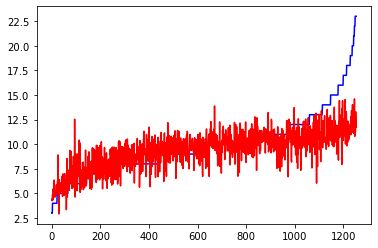

In [14]:
plt.plot(new_df['level_0'] , new_df[1],  'blue', new_df[0], 'red')

In [15]:
df.head()


,0,1,2,3,4,5,6,7,8
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
x_train

,0,1,2,3,4,5,6,7
2830,0,0.525,0.430,0.135,0.8435,0.4325,0.1800,0.1815
925,1,0.430,0.325,0.100,0.3645,0.1575,0.0825,0.1050
3845,2,0.455,0.350,0.105,0.4160,0.1625,0.0970,0.1450
547,2,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155
2259,0,0.590,0.465,0.160,1.1005,0.5060,0.2525,0.2950
...,...,...,...,...,...,...,...,...
3444,0,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.1450
466,0,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.4000
3092,2,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.1880
3772,2,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.2350


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [18]:
clf = GaussianNB()
clf.fit(x_train, y_train)
target_pred = clf.predict(x_test)

In [19]:
accuracy_score(y_test, target_pred, normalize = True)

0.24322169059011164

In [20]:
f1_score(y_test, target_pred, average="weighted")

0.21482151231257543

In [21]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

In [22]:
svm = SVC(kernel = 'linear',  C = 1)
ovo = OneVsOneClassifier(svm)
ovo.fit(x_train, y_train)
y_pred1 = ovo.predict(x_test)

In [23]:
accuracy_score(y_test, y_pred1, normalize = True)

0.26156299840510366

In [24]:
f1_score(y_test, y_pred1, average="weighted")

0.2008664298411847

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [26]:
# df.loc[(df[8] >= 1 & df[8] <= 4), 'AgeGroup'] = 'Young'
# df.loc[(df[8] >= 5 & df[8] <= 15), 'AgeGroup'] = 'Middle Age'
# df.loc[(df[8] > 15 ), 'AgeGroup'] = 'Old'


In [27]:
bins = [1,4,15, 40]
labels = ['Young', 'Middle Age', 'Old']
df['agegroup'] = pd.cut(x = df[8], bins = bins, labels = labels, right = False)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,agegroup
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Old
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Middle Age
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Middle Age
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Middle Age
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Middle Age


In [29]:
# Label encoding age-group column
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df[9] = le.fit_transform(df['agegroup'])
# df.head()
# df['agegroup'].head(50)

In [30]:
df[9] = df.agegroup.map({'Young': 1, 'Middle Age': 2, 'Old': 3})
df.head()

,0,1,2,3,4,5,6,7,8,agegroup,9
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Old,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Middle Age,2
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Middle Age,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Middle Age,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Middle Age,2


In [31]:
from sklearn import preprocessing
x = df.iloc[:, 0:8]
y = df.iloc[:, -1]
print(y)

0       3
1       2
2       2
3       2
4       2
       ..
4172    2
4173    2
4174    2
4175    2
4176    2
Name: 9, Length: 4177, dtype: category
Categories (3, int64): [1 < 2 < 3]


In [32]:
# split data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# print(x_train)

In [33]:
clf1 = GaussianNB()
clf1.fit(x_train, y_train)
target_pred1 = clf1.predict(x_test)

In [34]:
accuracy_score(y_test, target_pred1, normalize = True)

0.6881977671451356

In [35]:
f1_score(y_test, target_pred1, average="weighted")

0.7552847841581353

In [36]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

In [37]:
svm1 = SVC(kernel = 'linear',  C = 1)
ovo1 = OneVsOneClassifier(svm)
ovo1.fit(x_train, y_train)
y_pred2 = ovo1.predict(x_test)

In [38]:
accuracy_score(y_test, y_pred2, normalize = True)

0.9130781499202552

In [39]:
f1_score(y_test, y_pred2, average="weighted")

0.8715918980064128

In [40]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred2)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.91      1.00      0.95      1145
           3       0.00      0.00      0.00       106

    accuracy                           0.91      1254
   macro avg       0.30      0.33      0.32      1254
weighted avg       0.83      0.91      0.87      1254



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
y_pred2

array([2, 2, 2, ..., 2, 2, 2])

In [42]:
y_pred2.tolist()



[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [43]:
zipped = list(zip(y_pred2, y_test))
zipped

[(2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 

In [44]:
new_df1 = pd.DataFrame(zipped).sort_values(by = 1 , inplace = False)
new_df1

,0,1
37,2,1
355,2,1
358,2,1
813,2,2
815,2,2
...,...,...
254,2,3
1004,2,3
1006,2,3
950,2,3


In [45]:
new_df1 = new_df1.reset_index().reset_index()
new_df1

,level_0,index,0,1
0,0,37,2,1
1,1,355,2,1
2,2,358,2,1
3,3,813,2,2
4,4,815,2,2
...,...,...,...,...
1249,1249,254,2,3
1250,1250,1004,2,3
1251,1251,1006,2,3
1252,1252,950,2,3


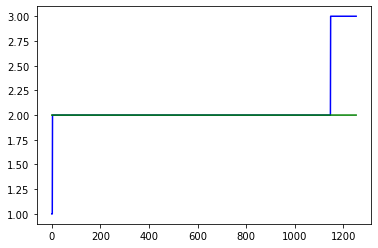

In [46]:
plt.plot(new_df1['level_0'], new_df1[1], 'blue', new_df1[0], 'green')


In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 45)
kmeans.fit(x_train)
predictions = kmeans.predict(x_test)

# print('Accuracy: {}'.format((sum(predictions == y_test)/len(predictions))))

In [48]:
predictions.tolist()

[2,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,


In [49]:
zipped = list(zip(predictions, y_test))
zipped

[(2, 2),
 (2, 2),
 (0, 3),
 (0, 2),
 (2, 2),
 (1, 2),
 (1, 2),
 (2, 2),
 (1, 2),
 (0, 2),
 (0, 3),
 (1, 2),
 (0, 3),
 (1, 2),
 (1, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 3),
 (0, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 2),
 (1, 2),
 (2, 2),
 (2, 2),
 (1, 2),
 (2, 2),
 (2, 2),
 (1, 2),
 (2, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 1),
 (0, 2),
 (1, 2),
 (2, 2),
 (0, 2),
 (2, 3),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 2),
 (2, 2),
 (2, 3),
 (1, 2),
 (1, 2),
 (0, 3),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (2, 3),
 (2, 3),
 (1, 2),
 (1, 2),
 (0, 2),
 (0, 2),
 (2, 2),
 (1, 2),
 (1, 2),
 (2, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (2, 2),
 (2, 2),
 (0, 2),
 (0, 2),
 (2, 2),
 (1, 2),
 (2, 2),
 (2, 3),
 (0, 2),
 (2, 3),
 (1, 2),
 (0, 3),
 (0, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (2, 2),
 (2, 2),
 (1, 2),
 (0, 3),
 (2, 2),
 (2, 2),
 (0, 2),
 (0, 2),
 (2, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (0, 3),
 (1, 2),
 (1, 2),
 (0, 3),
 (0, 2),
 (0, 2),
 (2, 2),
 (2, 2),
 (0, 2),
 (2, 2),
 (2, 2),
 (0, 2),
 (2, 2),
 (2, 3),
 

In [50]:
new_df2 = pd.DataFrame(zipped).sort_values(by = 1 , inplace = False)
new_df2

,0,1
37,1,1
355,1,1
358,1,1
813,1,2
815,2,2
...,...,...
254,2,3
1004,1,3
1006,0,3
950,2,3


In [51]:
new_df2 = new_df2.reset_index().reset_index()
new_df2

,level_0,index,0,1
0,0,37,1,1
1,1,355,1,1
2,2,358,1,1
3,3,813,1,2
4,4,815,2,2
...,...,...,...,...
1249,1249,254,2,3
1250,1250,1004,1,3
1251,1251,1006,0,3
1252,1252,950,2,3


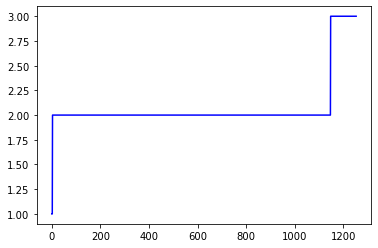

In [52]:
plt.plot(new_df2['level_0'], new_df2[1], 'blue')

In [53]:
kmeans.cluster_centers_

array([[1.77635684e-15, 5.80172228e-01, 4.55807320e-01, 1.58423036e-01,
        1.04649354e+00, 4.46912809e-01, 2.30892357e-01, 3.02618407e-01],
       [1.09642147e+00, 4.17539761e-01, 3.18071571e-01, 1.05208748e-01,
        3.99437873e-01, 1.75886680e-01, 8.54671968e-02, 1.19302684e-01],
       [1.98380567e+00, 5.85921053e-01, 4.59144737e-01, 1.58481781e-01,
        1.08356123e+00, 4.74566802e-01, 2.35181174e-01, 3.07821356e-01]])